<a href="https://colab.research.google.com/github/josephasal/cosmo_inference/blob/main/neural_network/neural_net_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training the neural network based on training data generated

In [22]:
#importing the csv of training data
import numpy as np
import pandas as pd

filepath = '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Restructured code/Neural net/noisy_training_data.csv'
training_data = pd.read_csv(filepath)

training_data.head()


,mu_z1,mu_z2,mu_z3,mu_z4,mu_z5,mu_z6,mu_z7,mu_z8,mu_z9,mu_z10,...,mu_z93,mu_z94,mu_z95,mu_z96,mu_z97,mu_z98,mu_z99,mu_z100,omega_m,h
0,33.091188,34.502323,35.296897,36.142479,36.308652,36.688684,37.274509,37.986471,37.625922,38.284030,...,43.492015,43.611113,44.138759,43.566433,43.525538,43.625455,43.790669,44.240573,0.345774,0.787935
1,32.923395,34.334268,35.611298,36.329663,36.103873,36.988169,37.510036,37.954490,38.202190,38.206865,...,43.518773,43.587473,43.758284,43.696095,44.028497,43.564545,43.997548,43.891455,0.326576,0.779762
2,33.592662,35.195594,36.050195,36.563122,37.181114,37.549662,37.887906,38.173140,38.379602,38.671381,...,44.235357,44.159279,44.028051,44.169593,44.325911,44.282752,44.382709,44.412833,0.384330,0.605975
3,32.764710,34.255700,35.348777,36.021726,36.578429,36.990043,37.342851,37.691134,37.972032,38.312718,...,43.612576,43.575782,43.575208,44.018634,43.720546,44.004150,43.898759,43.787047,0.239494,0.797337
4,33.065618,34.575700,35.712620,35.855178,36.705399,36.858994,37.047380,37.528961,37.649916,38.604322,...,43.710743,43.824512,44.027841,43.698333,43.551096,44.005859,43.922796,43.771892,0.359280,0.781288


In [24]:
# getting the columns for my X values, which is distance modulus at various redshifts
feature_columns = [f'mu_z{i+1}' for i in range(100)]
X = training_data[feature_columns].values

#getting the columns for my Y values which are omega m and h
Y = training_data[['omega_m', 'h']].values

#Splitting data into train, cross validation and test
* 70% train, 20% cross validaiton, 10% test

In [25]:
from sklearn.model_selection import train_test_split #so that i can do this randomly instead of using pandas

#split off the test set (10% of 5000 so 1000 samples for testing)
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size = 0.1, random_state= 69)

#Split the remaining samples 9k samples (stored in x and y temp) into training and cross validation sets

X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size =2000/9000, random_state = 69)

#checking sizes of train, cross_val and test
print('Training shape:', X_train.shape, Y_train.shape)
print('Cross Validation shape:', X_val.shape, Y_val.shape)
print('Test shape:', X_test.shape, Y_test.shape)

Training shape: (7000, 100) (7000, 2)
Cross Validation shape: (2000, 100) (2000, 2)
Test shape: (1000, 100) (1000, 2)


Normalising the data so mean is 0 and variance is 1

In [27]:
from sklearn.preprocessing import StandardScaler
#scaling X

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

#scaling y

scaler_y = StandardScaler()
Y_train_scaled = scaler_y.fit_transform(Y_train)
Y_val_scaled = scaler_y.transform(Y_val)
Y_test_scaled = scaler_y.transform(Y_test)

#Basic Neural Network

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

#simple neural network
model = models.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dense(2) #output of omega m and h
])

#compiling
optimizer = Adam(learning_rate = 1e-4)
model.compile(optimizer = optimizer, loss = 'mse')

#train
history = model.fit(X_train_scaled, Y_train_scaled,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (X_val_scaled, Y_val_scaled))



Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 1.5650 - val_loss: 0.8633
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.8126 - val_loss: 0.7028
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6633 - val_loss: 0.6059
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5760 - val_loss: 0.5400
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5187 - val_loss: 0.4917
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4632 - val_loss: 0.4550
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4385 - val_loss: 0.4252
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3963 - val_loss: 0.4009
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3751 - val_loss: 0.3812
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3591 - val_loss: 0.3646
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3386 - val_loss: 0.3504
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━

In [55]:
#evaluating accuracy on the test set
test_loss = model.evaluate(X_test_scaled, Y_test_scaled)
print('Test loss(MSE):', test_loss)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2780 
Test loss(MSE): 0.2829377353191376


In [56]:
# Print the final epoch's training and validation loss
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print("Final training loss:", final_train_loss)
print("Final validation loss:", final_val_loss)


Final training loss: 0.18045249581336975
Final validation loss: 0.26883554458618164


In [57]:
# Make predictions on the scaled test data
Y_pred_scaled = model.predict(X_test_scaled)

# Inverse-transform predictions back to the original scale
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
# Compute the mean and standard deviation
mean_pred= np.mean(Y_pred, axis=0)
std_pred = np.std(Y_pred, axis = 0)

print(f"Predicted Omega_m: {mean_pred[0]:.4f} +/- {std_pred[0]:.4f}")
print(f"Predicted h:       {mean_pred[1]:.4f} +/- {std_pred[1]:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted Omega_m: 0.2985 +/- 0.0451
Predicted h:       0.7013 +/- 0.0572


In [32]:
!pip install SciencePlots

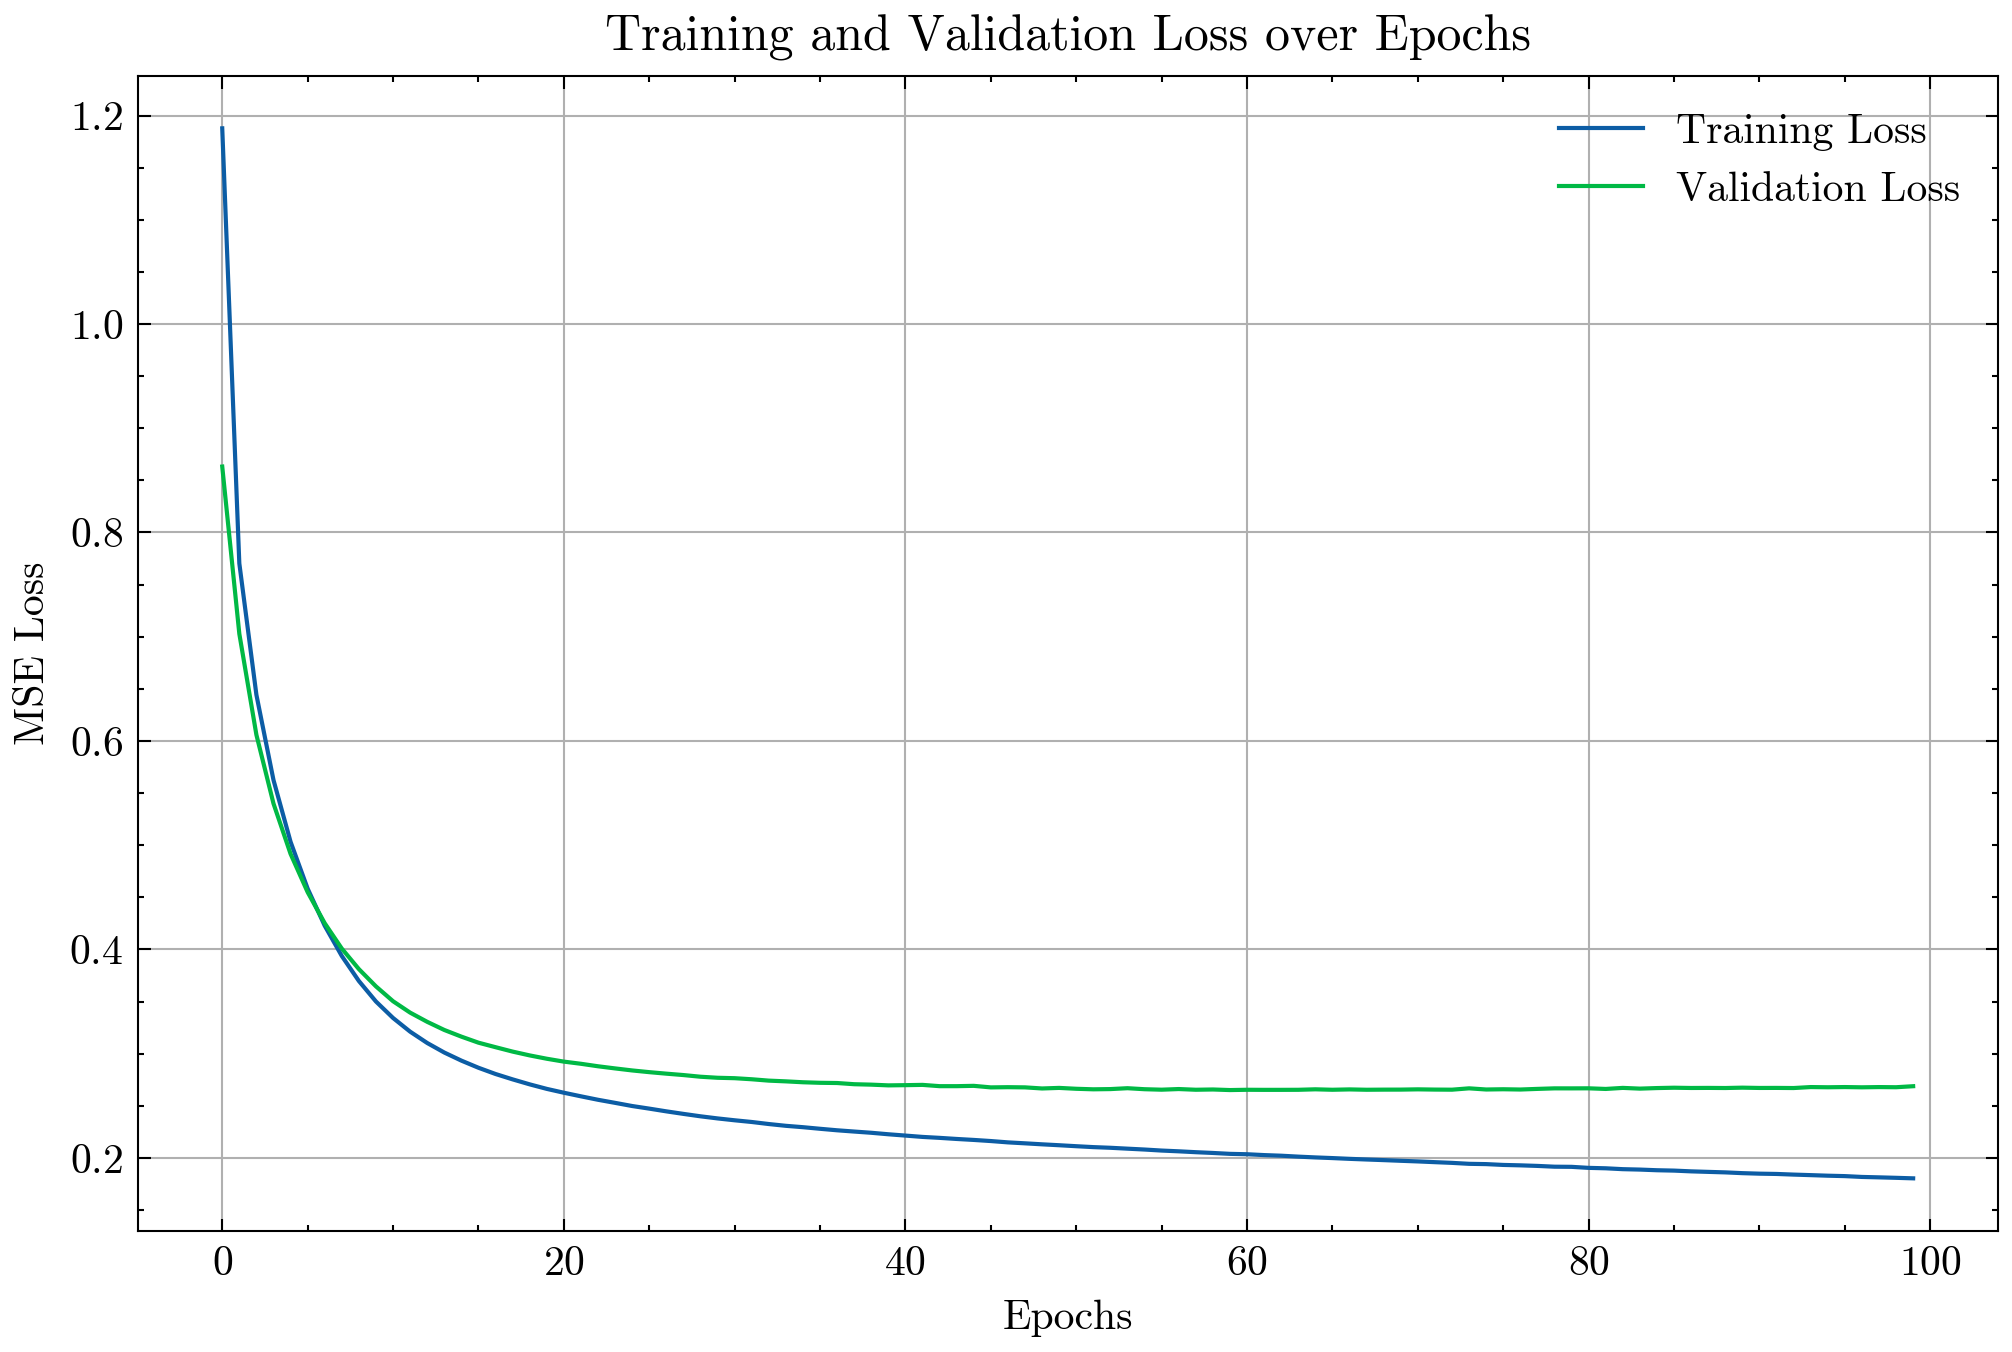

In [58]:
import matplotlib.pyplot as plt
import scienceplots


#loss curves vs epochs
plt.figure(figsize=(8, 5), dpi = 300)
plt.style.use(['science', 'no-latex'])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


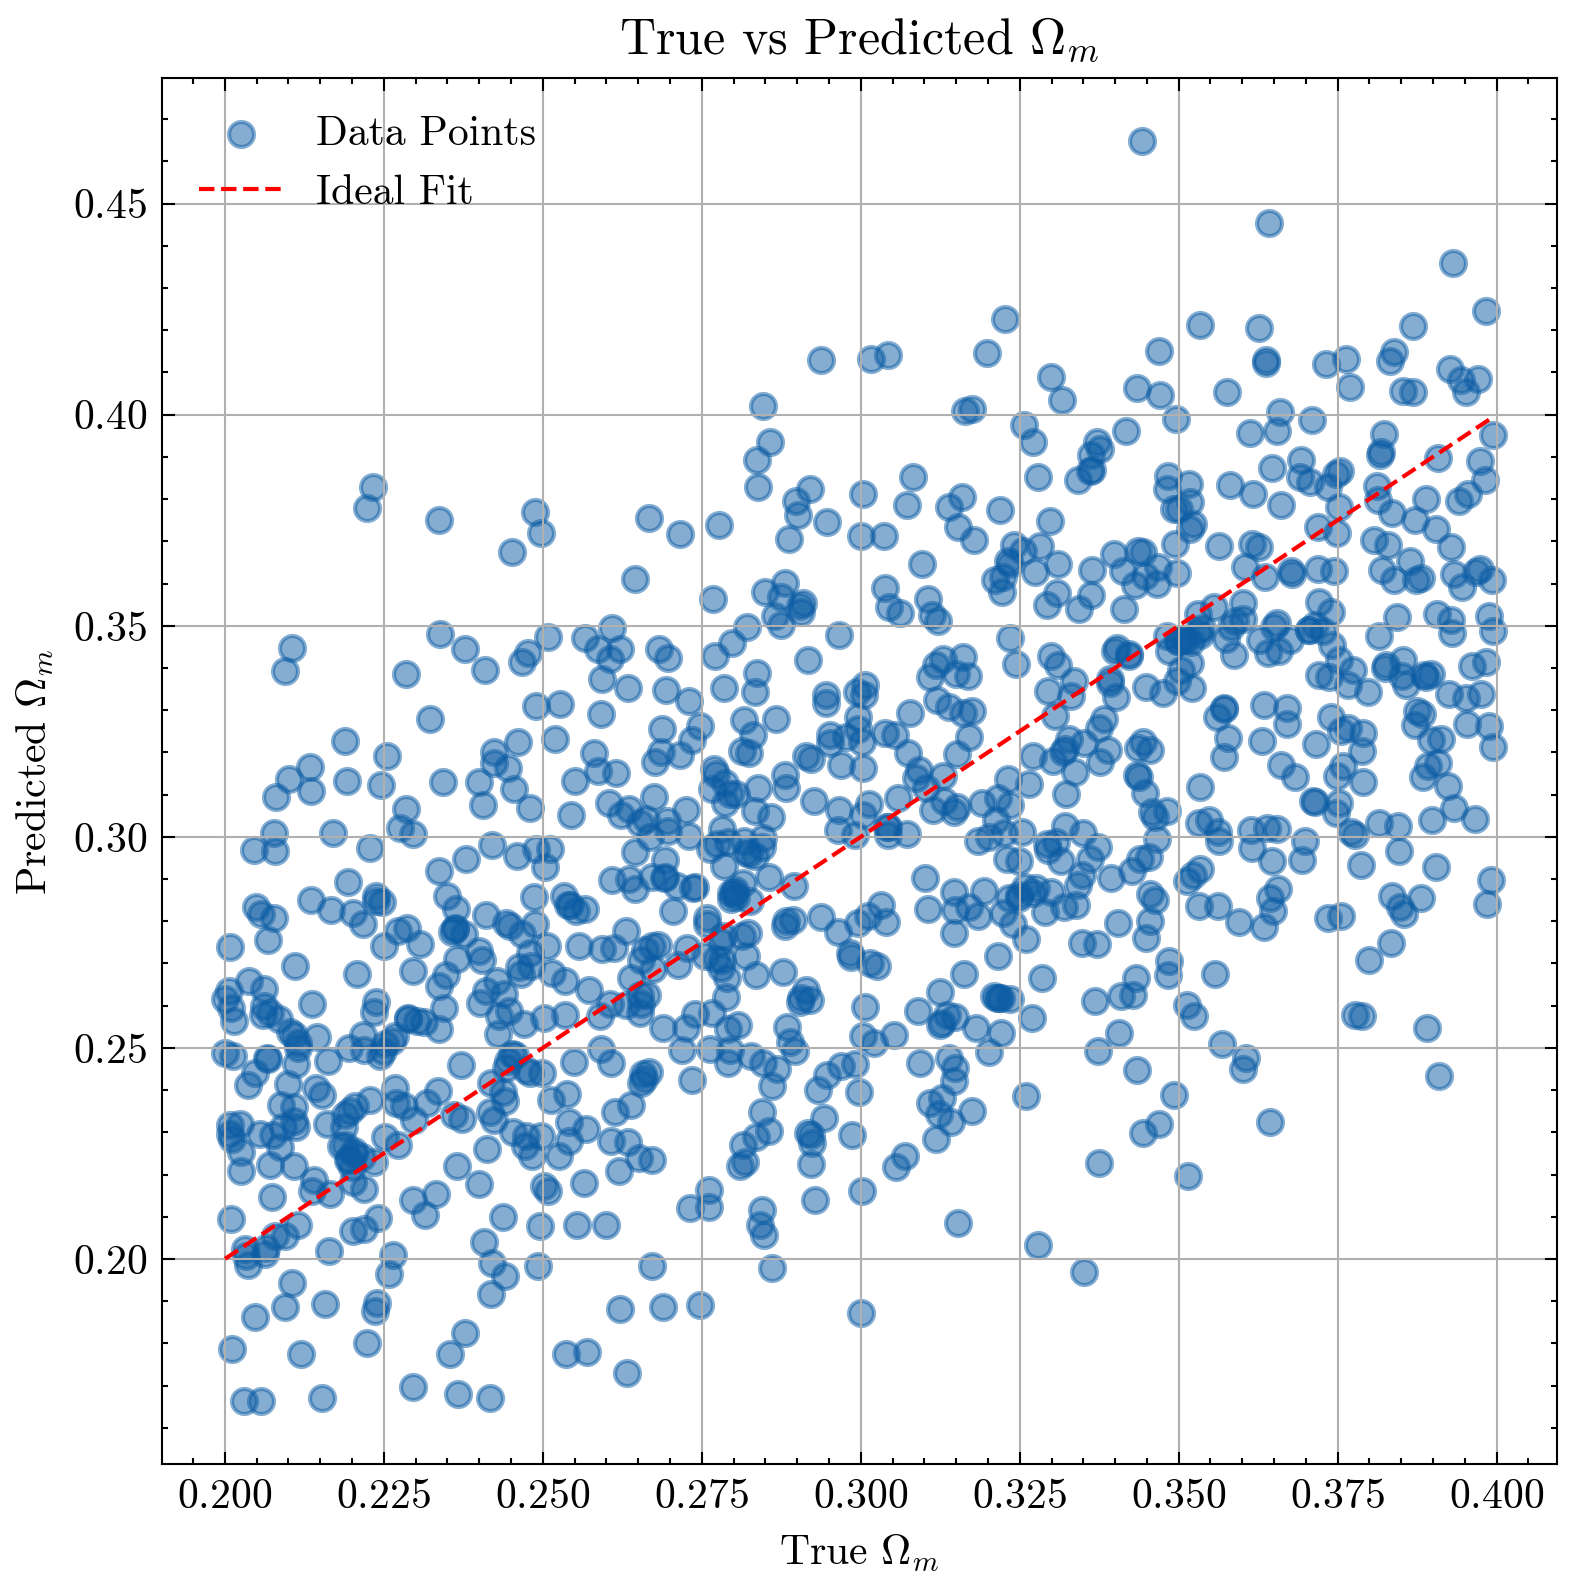

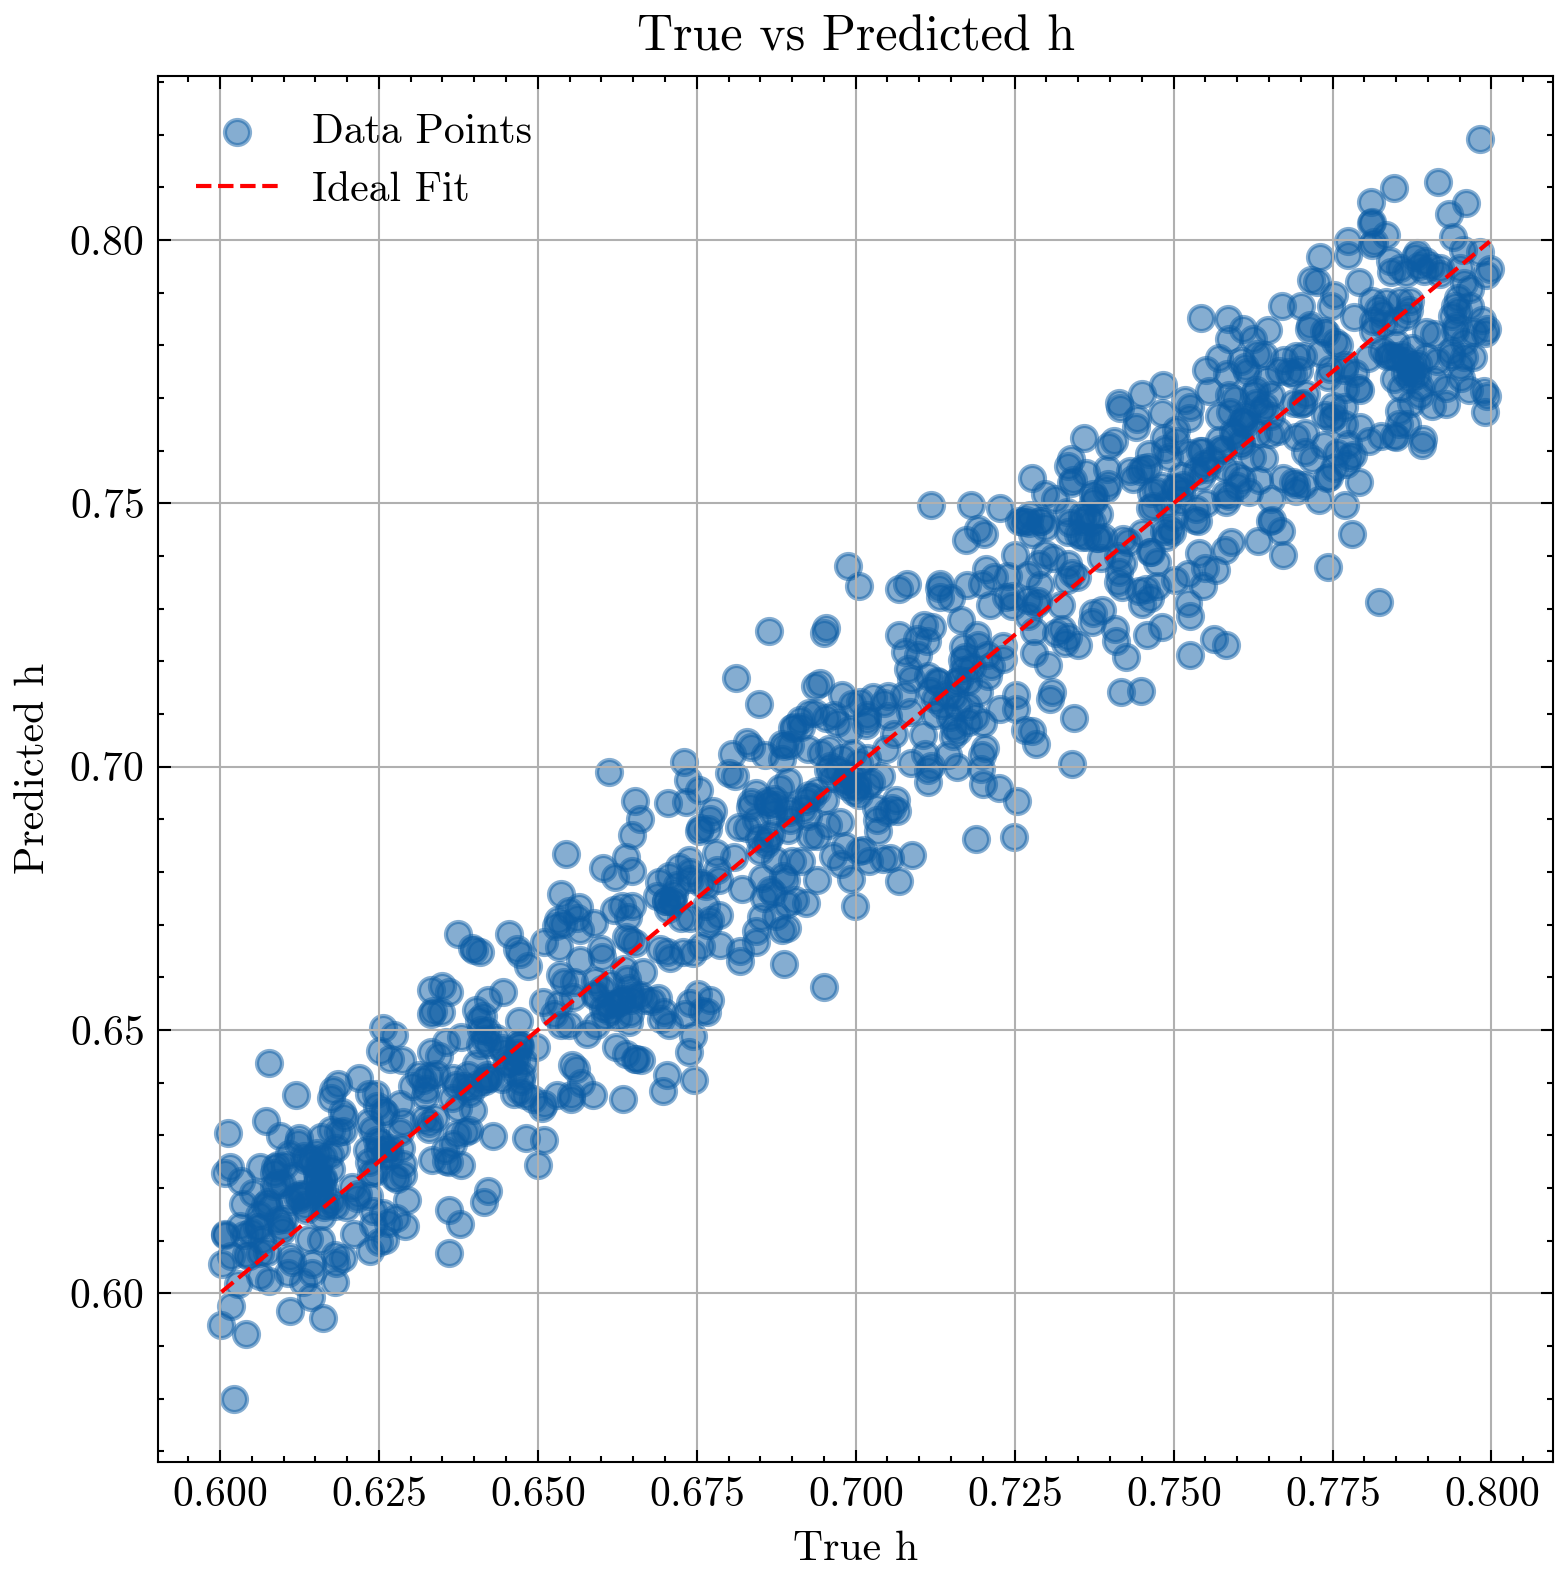

In [34]:
#True vs predicted values

# Scatter plot for Omega_m
plt.figure(figsize=(6, 6), dpi = 300)
plt.style.use(['science', 'no-latex'])
plt.scatter(Y_test[:, 0], Y_pred[:, 0], alpha=0.5, label="Data Points")
plt.plot([Y_test[:, 0].min(), Y_test[:, 0].max()],
         [Y_test[:, 0].min(), Y_test[:, 0].max()], 'r--', label="Ideal Fit")
plt.xlabel('True $\Omega_{m}$')
plt.ylabel('Predicted $\Omega_{m}$')
plt.title('True vs Predicted $\Omega_{m}$')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for h
plt.figure(figsize=(6, 6), dpi = 300)
plt.style.use(['science', 'no-latex'])
plt.scatter(Y_test[:, 1], Y_pred[:, 1], alpha=0.5, label="Data Points")
plt.plot([Y_test[:, 1].min(), Y_test[:, 1].max()],
         [Y_test[:, 1].min(), Y_test[:, 1].max()], 'r--', label="Ideal Fit")
plt.xlabel('True h')
plt.ylabel('Predicted h')
plt.title('True vs Predicted h')
plt.legend()
plt.grid(True)
plt.show()

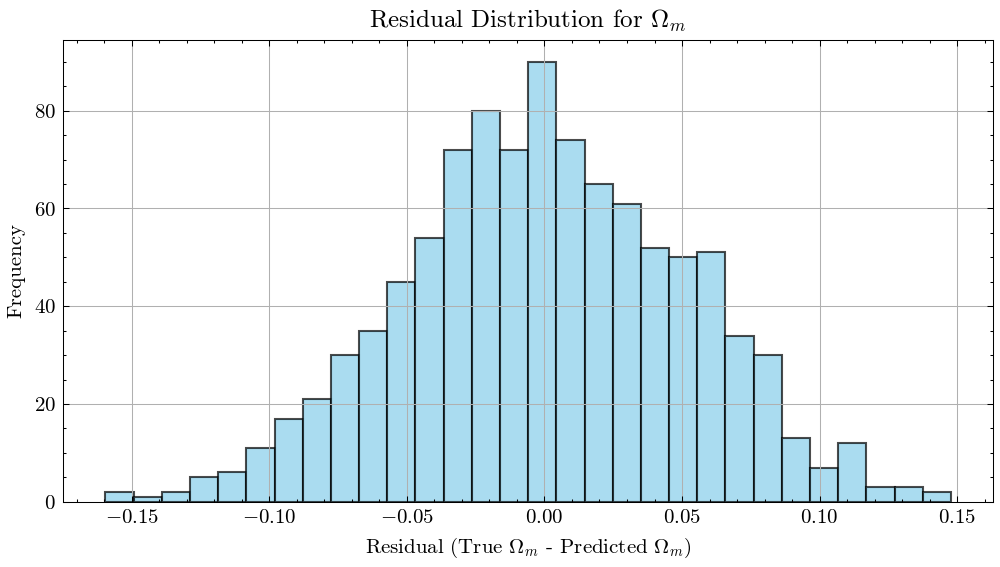

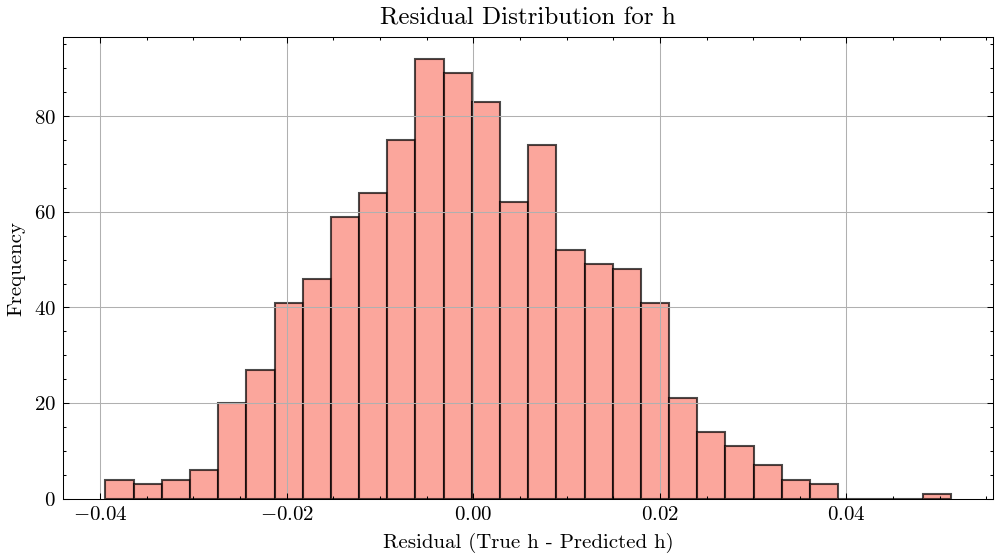

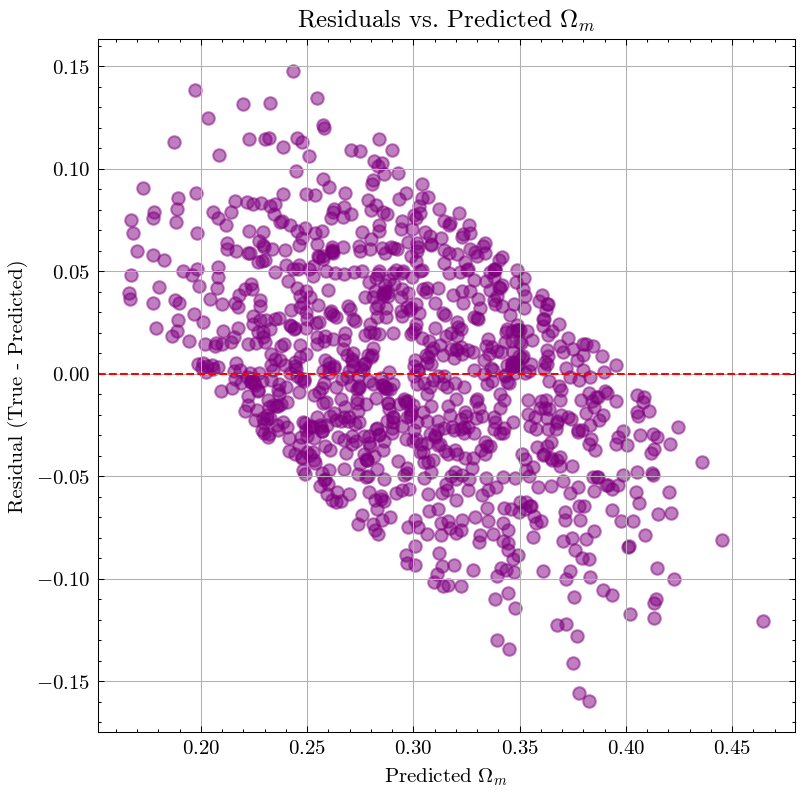

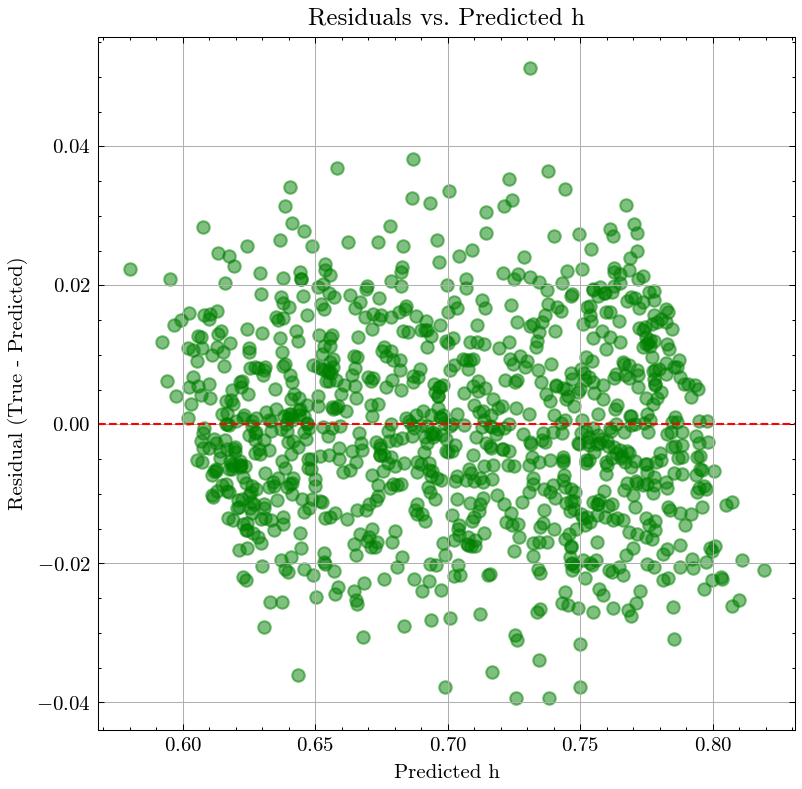

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Assume Y_test is your true targets (original scale) and Y_pred are the predictions (also in original scale)
# Calculate residuals
residuals = Y_test - Y_pred

# Separate residuals for each parameter
residuals_omega = residuals[:, 0]  # for Omega_m
residuals_h = residuals[:, 1]      # for h

# 1. Plot a histogram of residuals for Omega_m
plt.figure(figsize=(8, 4), dpi = 150)
plt.hist(residuals_omega, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Residual (True $\Omega_{m}$ - Predicted $\Omega_{m}$)')
plt.ylabel('Frequency')
plt.title('Residual Distribution for $\Omega_{m}$')
plt.grid(True)
plt.show()

# 2. Plot a histogram of residuals for h
plt.figure(figsize=(8, 4), dpi = 150)
plt.hist(residuals_h, bins=30, alpha=0.7, color='salmon', edgecolor='black')
plt.xlabel('Residual (True h - Predicted h)')
plt.ylabel('Frequency')
plt.title('Residual Distribution for h')
plt.grid(True)
plt.show()

# 3. Plot Residuals vs. Predicted for Omega_m
plt.figure(figsize=(6, 6), dpi = 150)
plt.scatter(Y_pred[:, 0], residuals_omega, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted $\Omega_{m}$')
plt.ylabel('Residual (True - Predicted)')
plt.title('Residuals vs. Predicted $\Omega_{m}$')
plt.grid(True)
plt.show()

# 4. Plot Residuals vs. Predicted for h
plt.figure(figsize=(6, 6), dpi = 150)
plt.scatter(Y_pred[:, 1], residuals_h, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted h')
plt.ylabel('Residual (True - Predicted)')
plt.title('Residuals vs. Predicted h')
plt.grid(True)
plt.show()


#Using this Neural network on the observational data provided



In [36]:
#loading in the supernova data set
import numpy as np
import pandas as pd

filepath = '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Restructured code/LOWZ+ESSENCE+SNLS.csv'
supernova_df = pd.read_csv(filepath)

#defining variables
redshift = supernova_df['Z']
distance_mod = supernova_df['MU']
err_distance_mod = supernova_df['MUERR']  #can maybe incorporate this into a bayesian neural network??
supernova_df.shape

(151, 15)

In [37]:
#change redshift and distance mod into numpy arrays
z = redshift.values
mu = distance_mod.values

#neural network was trained on vectors of 50 dimensions that represented mu at 50 different redshift values
# need to format the data to match the neural network input via interpolation
target_z = np.linspace(z.min(), z.max(), 100)
print("Target redshift grid:", target_z)


from scipy.interpolate import interp1d

# Create an interpolation function.
# "linear" interpolation is common, but you can also try 'cubic' if you think the curve is smooth.
interp_func = interp1d(z, mu, kind='linear', fill_value="extrapolate")

# Use the interpolation function to compute μ at each redshift in target_z
mu_on_grid = interp_func(target_z)

print("Interpolated μ values on fixed grid:", mu_on_grid)

X_obs = mu_on_grid.reshape(1, -1)
print("X_obs shape:", X_obs.shape)

Target redshift grid: [0.0218     0.03178182 0.04176364 0.05174545 0.06172727 0.07170909
 0.08169091 0.09167273 0.10165455 0.11163636 0.12161818 0.1316
 0.14158182 0.15156364 0.16154545 0.17152727 0.18150909 0.19149091
 0.20147273 0.21145455 0.22143636 0.23141818 0.2414     0.25138182
 0.26136364 0.27134545 0.28132727 0.29130909 0.30129091 0.31127273
 0.32125455 0.33123636 0.34121818 0.3512     0.36118182 0.37116364
 0.38114545 0.39112727 0.40110909 0.41109091 0.42107273 0.43105455
 0.44103636 0.45101818 0.461      0.47098182 0.48096364 0.49094545
 0.50092727 0.51090909 0.52089091 0.53087273 0.54085455 0.55083636
 0.56081818 0.5708     0.58078182 0.59076364 0.60074545 0.61072727
 0.62070909 0.63069091 0.64067273 0.65065455 0.66063636 0.67061818
 0.6806     0.69058182 0.70056364 0.71054545 0.72052727 0.73050909
 0.74049091 0.75047273 0.76045455 0.77043636 0.78041818 0.7904
 0.80038182 0.81036364 0.82034545 0.83032727 0.84030909 0.85029091
 0.86027273 0.87025455 0.88023636 0.89021818 0.9

In [38]:
 X_obs_scaled = scaler_X.transform(X_obs)

# Putting into the model
Y_pred_scaled = model.predict(X_obs_scaled)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)
print(Y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.45620987 0.61671704]]


In [39]:
# Scale observational data exactly as training data
X_obs_scaled = scaler_X.transform(X_obs)

# Predict cosmological parameters (omega_m, h)
Y_pred_scaled = model.predict(X_obs_scaled)

# Convert predictions back to original scale
Y_pred = scaler_y.inverse_transform(Y_pred_scaled)

# Clearly print your results
predicted_omega_m, predicted_h = Y_pred[0]
print(f"Predicted Omega_m: {predicted_omega_m:.4f}")
print(f"Predicted h:       {predicted_h:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Omega_m: 0.4562
Predicted h:       0.6167


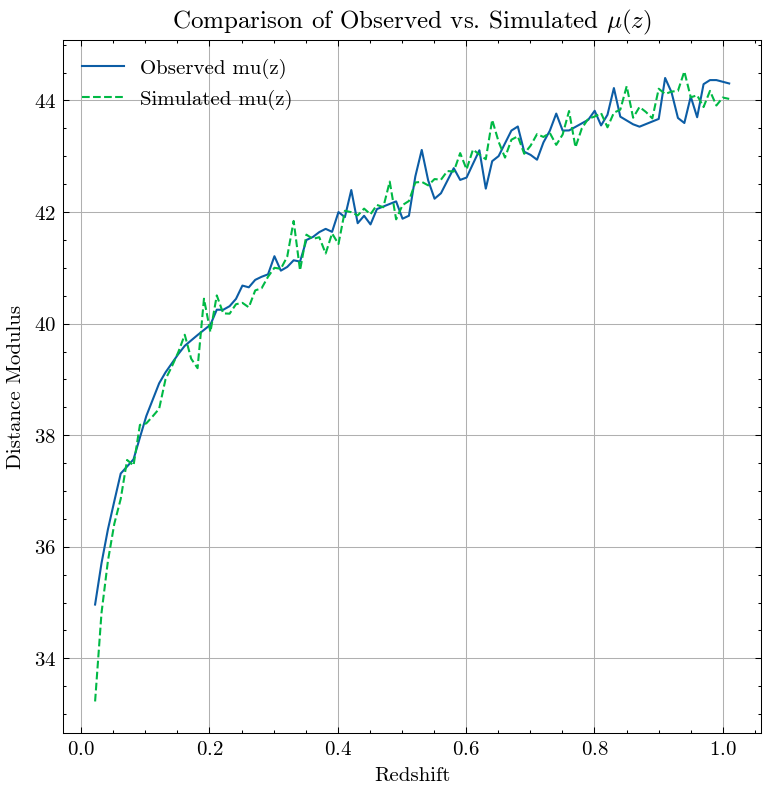

In [41]:
import matplotlib.pyplot as plt

# Plot observed curve
plt.figure(figsize = (6,6), dpi = 150)
plt.plot(target_z, mu_on_grid, label='Observed mu(z)')

# Optionally, plot a simulated training curve (if available)
# For example, take a random training sample and plot its mu vector
plt.plot(target_z, X_train[0], label='Simulated mu(z)', linestyle='--')

plt.xlabel('Redshift')
plt.ylabel('Distance Modulus')
plt.legend()
plt.grid(True)
plt.title('Comparison of Observed vs. Simulated $\mu(z)$')
plt.show()
